# Extract the PSF  some stars in HD163466 Y3 field
=====================================================================

- Creation : Friday 2016 July 7th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

PSF of HD163466 with Y3


## 1) Import package

In [443]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [444]:
import photutils
from astropy.stats import sigma_clipped_stats
from photutils import daofind
from photutils import CircularAperture
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [445]:
#photutils.test()

In [446]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [447]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [448]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-07-07 21:55:43.496426
fits date format for the analysis :  2016-07-07T21:55:43


## 3) Configuration of the input file



In [449]:

object_name='HD163466_y3'

In [450]:
path='./HD163466_y3'
basefilename='AssScImHD163466_y3_10.fits' # check master bias
filename=os.path.join(path,basefilename)

## 4) Read the images

In [451]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

data=ccd_chan.data

## 5) Shows the images

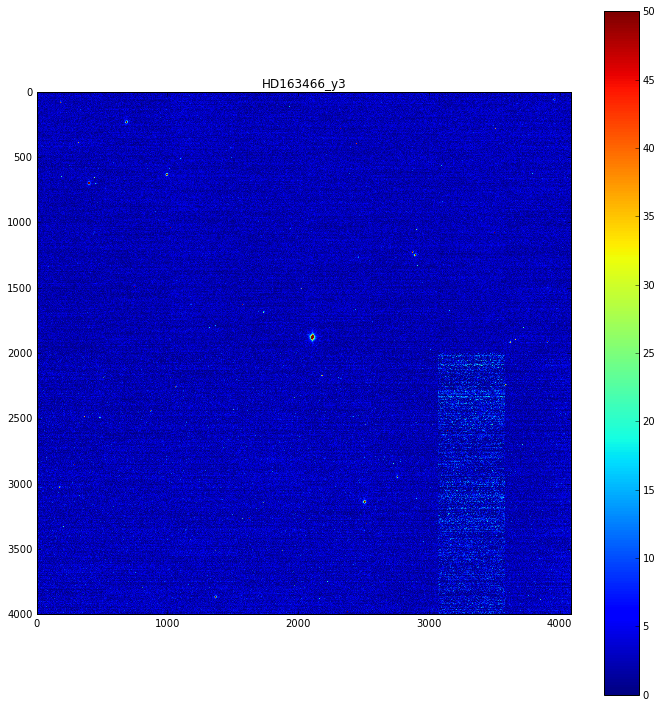

In [452]:
fig, ax = plt.subplots(figsize=(10, 10))
img=ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)
#plt.savefig(outputfigfilename3)

# 6) Subtract background

code implemented from photutil information there:
https://photutils.readthedocs.io/en/latest/photutils/background.html#

In [453]:
from photutils.background import Background2D
bkg = Background2D(data, (100, 100), filter_size=(3, 3),method='median')

### does the background varies over the field of view ?

In [454]:
print('median background = ',bkg.background_median)
print('median rms = ',bkg.background_rms_median)

('median background = ', 2.3737717110640766)
('median rms = ', 2.2128397787207081)


### Radiography of the residual background

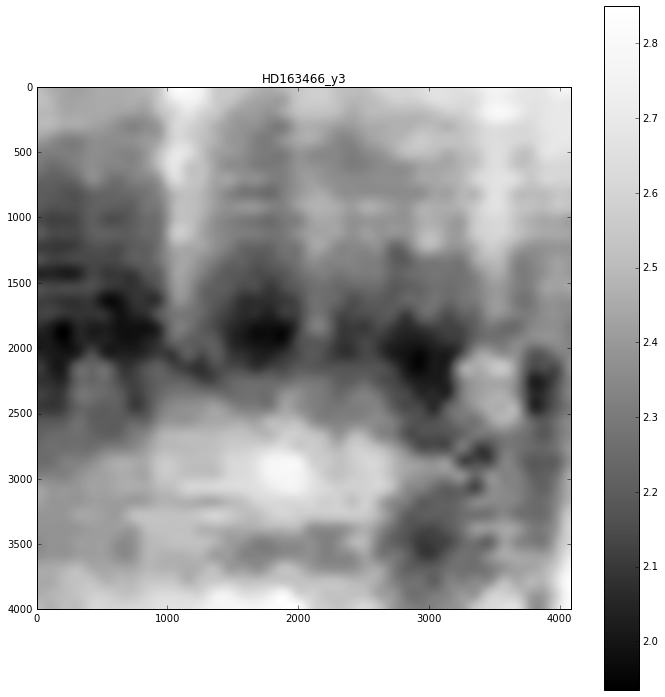

In [455]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=ax.imshow(bkg.background, cmap='Greys_r')
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

### Now subtract residual the background

In [456]:
data2=data - bkg.background

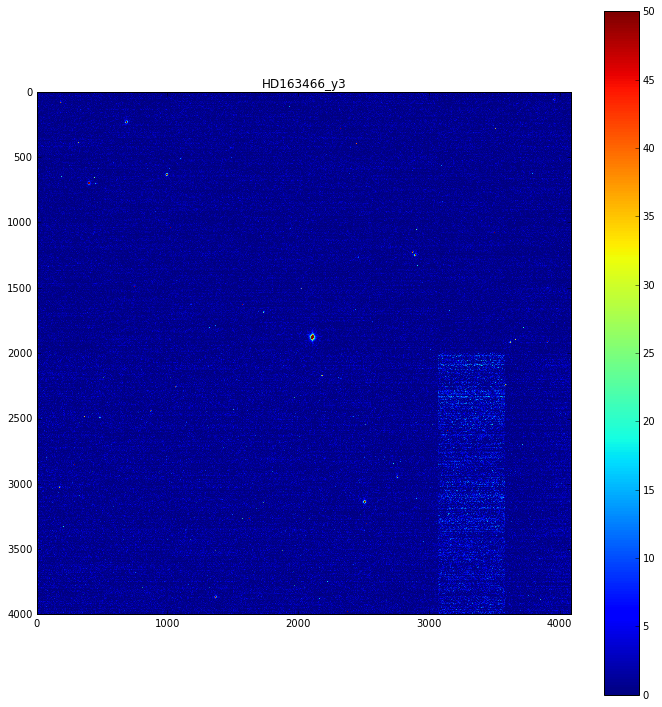

In [457]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(bkg.background, origin='lower', cmap='Greys_r')
img=plt.imshow(data2, vmin=0,vmax=50.)
#img=plt.imshow(data2)
plt.title(object_name)
plt.tight_layout()
plt.colorbar(img)

## 8.) Compute signal and noise

In [458]:
mean, median, std = sigma_clipped_stats(data2, sigma=10.0, iters=5)    
print(mean, median, std)    

(0.035290354435429966, 0.018661498545488264, 2.627270329457347)


In [459]:
sources = daofind(data2 - median, fwhm=3.0, threshold=50.*std)
sources.sort('flux')
print(sources)   

 id   xcentroid     ycentroid   ...      peak          flux           mag       
--- ------------- ------------- ... ------------- ------------- ----------------
 12 3901.22517084 1916.40494502 ...  235.33897427 1.09396344599 -0.0975070264959
 14 868.857230888 2444.73171169 ...  253.19508148 1.14288055083  -0.145002105243
  3 3928.04078414 587.655347619 ... 181.264881919 1.22907439221  -0.223945425583
 16 174.345853786 3029.08358935 ... 342.856344095 1.65162339478   -0.54477756476
  8 1834.69991403 1161.50644814 ... 266.034562082 1.78233983028  -0.627476281162
  1 3952.45002745  64.402172449 ... 423.142388064  1.8503406424  -0.668129220327
 13 3579.59415343 2248.08550319 ... 439.170578097 1.90595474435  -0.700281460967
  9 2869.67356454  1229.3973344 ...  458.59982189  2.0039700072  -0.754728043231
 19 2517.48010704 3306.82349305 ... 360.277979279 2.06093633749  -0.785161441477
 15   2753.547456 2949.08787422 ... 567.781890188 2.50705314679  -0.997908851563
 18 2515.07190765  3304.3893

In [460]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
12,3901.22517084,1916.40494502,0.459113037908,-0.914461947238,-0.190994415658,25.0,0.0,235.33897427,1.09396344599,-0.0975070264959
14,868.857230888,2444.73171169,0.430951179175,-0.664325037447,0.0809683906557,25.0,0.0,253.19508148,1.14288055083,-0.145002105243
3,3928.04078414,587.655347619,0.862120716096,0.301583588886,0.0729117638125,25.0,0.0,181.264881919,1.22907439221,-0.223945425583
16,174.345853786,3029.08358935,0.439162976703,-0.521070683511,-0.00972751611007,25.0,0.0,342.856344095,1.65162339478,-0.54477756476
8,1834.69991403,1161.50644814,0.680088649609,0.937537029252,0.119824520986,25.0,0.0,266.034562082,1.78233983028,-0.627476281162
1,3952.45002745,64.402172449,0.465692180381,-0.684044770836,-0.0631555774078,25.0,0.0,423.142388064,1.8503406424,-0.668129220327
13,3579.59415343,2248.08550319,0.448875542231,-0.928369354027,-0.126346326114,25.0,0.0,439.170578097,1.90595474435,-0.700281460967
9,2869.67356454,1229.3973344,0.428200014678,-0.899637535546,-0.0115064812628,25.0,0.0,458.59982189,2.0039700072,-0.754728043231
19,2517.48010704,3306.82349305,0.885850988621,0.852095275356,-0.119050984361,25.0,0.0,360.277979279,2.06093633749,-0.785161441477


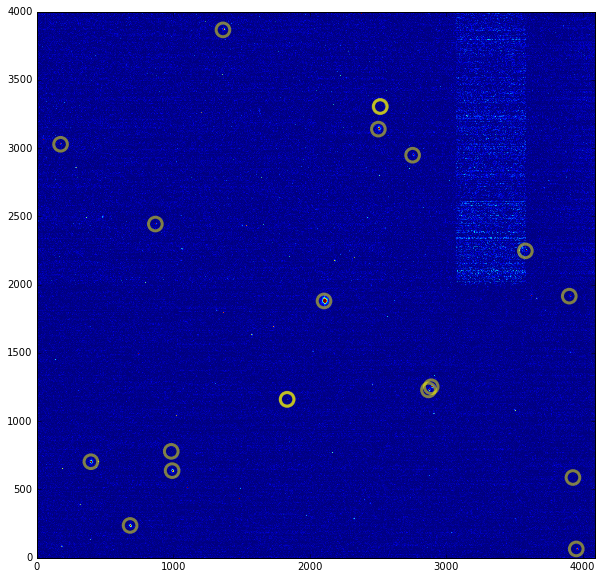

In [461]:
fig, ax = plt.subplots(figsize=(10, 10))
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=50.)
norm = ImageNormalize(stretch=SqrtStretch())
ax.imshow(data2,vmin=0,vmax=50.,origin='lower')
#ax.imshow(data, cmap='Greys', origin='lower', norm=norm)
apertures.plot(color='yellow', lw=3., alpha=0.5)

### For example shows the 25 first stars

In [462]:
NBSTARS=25
XX=np.zeros(NBSTARS)
YY=np.zeros(NBSTARS)



selected_stars=sources.as_array()
NBFOUNDSTARS=np.min([NBSTARS,selected_stars.shape[0]])

for istar in range(NBFOUNDSTARS):
    XX[istar] = int(selected_stars[istar][1])
    YY[istar] = int(selected_stars[istar][2])   
    print XX[istar],YY[istar]

3901.0 1916.0
868.0 2444.0
3928.0 587.0
174.0 3029.0
1834.0 1161.0
3952.0 64.0
3579.0 2248.0
2869.0 1229.0
2517.0 3306.0
2753.0 2949.0
2515.0 3304.0
2889.0 1252.0
1364.0 3867.0
1833.0 1159.0
683.0 236.0
985.0 779.0
991.0 638.0
396.0 703.0
2502.0 3140.0
2104.0 1881.0


## Work with one PSF of one star

In [463]:
# Extract the plot of a PSF
index=1

onepsf=data2[YY[index]-10:YY[index]+10,XX[index]-10:XX[index]+10]
onepsfX=onepsf.sum(axis=0)
onepsfY=onepsf.sum(axis=1)

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


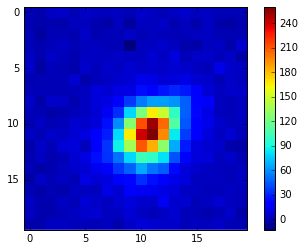

In [464]:
im=plt.imshow(onepsf,interpolation='None')
#im=plt.imshow(onepsf)
plt.colorbar(im)

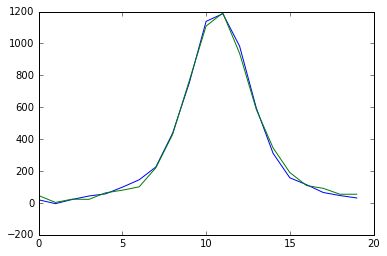

In [465]:
plt.plot(onepsfX)
plt.plot(onepsfY)

In [466]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, np.sqrt(variance))

In [467]:
DELTA_NBINSX=10
DELTA_NBINSY=10

In [468]:
weighted_avg_and_std(np.arange(onepsfX.shape[0]),onepsfX)

(10.686864374947083, 2.6631257102459323)

In [469]:
weighted_avg_and_std(np.arange(onepsfY.shape[0]),onepsfY)

(10.789506612998304, 2.8060261491665353)

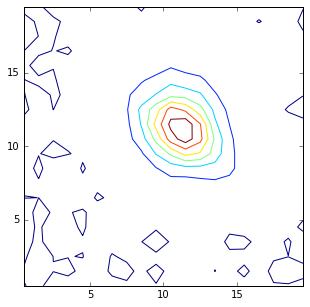

In [470]:
plt.figure(figsize=(5,5))
#onepsf2 = onepsf / np.linalg.norm(onepsf, axis=-1)[:, np.newaxis]
onepsf2 = onepsf / np.sum(onepsf)
levels=np.array([1,0.682,0.75,0.89,0.94,0.96,0.97])
#plt.contour(onepsf2,levels=levels,origin='lower') matmpltlib bug
plt.contour(onepsf2,origin='lower')

In [471]:
XV=np.arange(2*DELTA_NBINSX)-DELTA_NBINSX
YV=np.arange(2*DELTA_NBINSY)-DELTA_NBINSY
Xgrid,Ygrid=np.meshgrid(XV,YV)

In [472]:
weighted_avg_and_std(Xgrid,onepsf2)

(0.68686437494708141, 2.6631257102459318)

In [473]:
weighted_avg_and_std(Ygrid,onepsf2)

(0.78950661299830349, 2.8060261491665353)

### Estimation of PRF (PSF) for a bunch of stars


I could not use any of the utilities function.
It lacks of working examples

In [474]:
import photutils.psf 
from photutils.psf import psf_photometry

In [475]:
from astropy.modeling import models, fitting

In [476]:
import photutils
from photutils import psf

photutils.__version__

u'0.3.dev1833'

### Extraction of a few stars for visualization

In [477]:
DELTA_NBINSX=10
DELTA_NBINSY=10

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


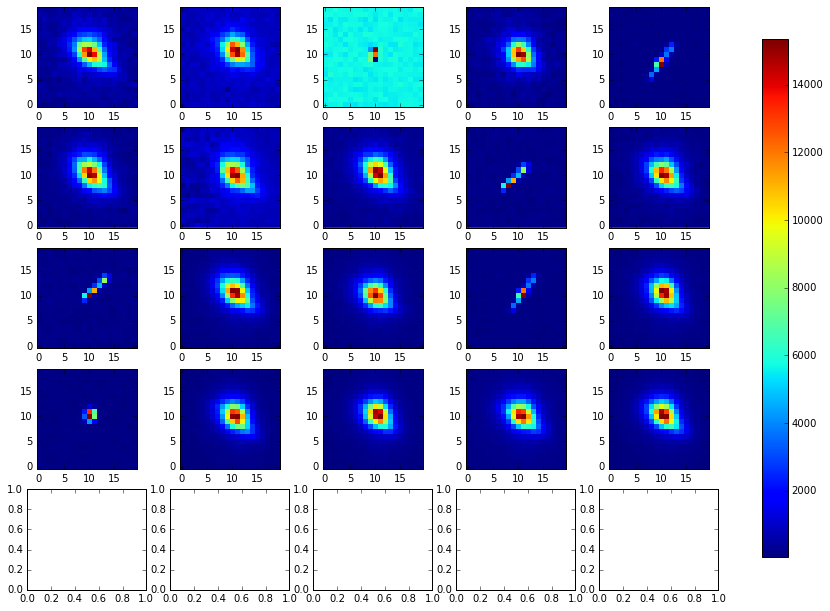

In [478]:
fig, axes = plt.subplots(nrows=5, ncols=5)
fig.set_size_inches(12, 9)
# Plot kernels
for i in range(5):
    for j in range(5):
        index=5*i+j
        if index <NBFOUNDSTARS :
            prf_image = data2[YY[index]-DELTA_NBINSY:YY[index]+DELTA_NBINSY,XX[index]-DELTA_NBINSX:XX[index]+DELTA_NBINSX]
            im = axes[i, j].imshow(prf_image, interpolation='None',origin='lower')
			
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
plt.colorbar(im, cax=cax)
plt.subplots_adjust(left=0.05, right=0.85, top=0.95, bottom=0.05)
plt.show()

In [479]:
selected_stars=sources.as_array()

NB_OF_STARS=selected_stars.shape[0]
SIGMAX_OF_STARS=np.zeros(NB_OF_STARS)
SIGMAY_OF_STARS=np.zeros(NB_OF_STARS)
for istar in range(selected_stars.shape[0]):
    XXs = int(selected_stars[istar][1])
    YYs = int(selected_stars[istar][2])   
    star_image = data2[YYs-DELTA_NBINSY:YYs+DELTA_NBINSY,XXs-DELTA_NBINSX:XXs+DELTA_NBINSX]
    thepsf = star_image / np.sum(star_image)
    SIGMAX_OF_STARS[istar]=weighted_avg_and_std(Xgrid,thepsf)[1]
    SIGMAY_OF_STARS[istar]=weighted_avg_and_std(Ygrid,thepsf)[1]

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt


In [480]:
SIGMAX_OF_STARS

array([ 2.84838373,  2.66312571,  1.48059768,  2.59502702,  0.77447261,
        2.83914232,  2.54177021,  2.88294793,  2.27765237,  2.84529322,
        2.08473524,  2.83900465,  2.72393527,  1.00299808,  2.67731971,
        0.17886447,  2.70344902,  2.65771678,  2.77416454,  2.76796885])

In [481]:
SIGMAY_OF_STARS

array([ 2.93571297,  2.80602615,         nan,  2.74978053,  1.21873009,
        2.9823544 ,  2.99679708,  2.92720512,  2.15229871,  2.92096737,
        1.53062224,  2.93654428,  2.79965004,  1.651981  ,  2.86178118,
        0.82507814,  2.86465477,  2.81063459,  2.83633047,  2.86057474])

#### Cut NAN

In [482]:
all_sigx=SIGMAX_OF_STARS[np.logical_not(np.isnan(SIGMAX_OF_STARS))]
all_sigy=SIGMAY_OF_STARS[np.logical_not(np.isnan(SIGMAY_OF_STARS))]

#### Cut too low values

In [483]:
all_sigx=all_sigx[all_sigx>2.0]
all_sigy=all_sigy[all_sigy>2.0]

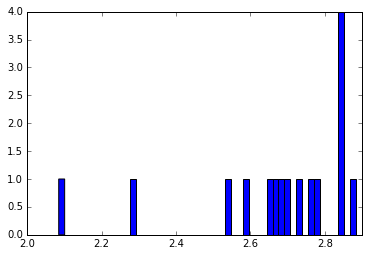

In [484]:
h1=plt.hist(all_sigx,50)

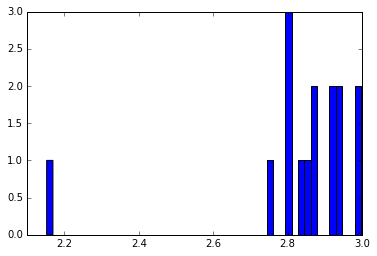

In [485]:
h1=plt.hist(all_sigy,50)

In [486]:
all_sigx.mean()

2.670102286809048

In [487]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigx.mean(),all_sigx.std(),all_sigx.mean()*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(all_sigy.mean(),all_sigy.std(),all_sigy.mean()*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 2.67 +/- 0.21 pixels ==> psf  2.52 +/- 0.19 arcsec 
average prf(y) = 2.83 +/- 0.19 pixels ==> psf  2.67 +/- 0.17 arcsec 


In [488]:
print 'average prf(x) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigx),all_sigx.std(),np.median(all_sigx)*0.4*2.36,all_sigx.std()*0.4*2.26)
print 'average prf(y) = {:2.2f} +/- {:2.2f} pixels ==> psf  {:2.2f} +/- {:2.2f} arcsec '.format(np.median(all_sigy),all_sigy.std(),np.median(all_sigy)*0.4*2.36,all_sigy.std()*0.4*2.26)

average prf(x) = 2.71 +/- 0.21 pixels ==> psf  2.56 +/- 0.19 arcsec 
average prf(y) = 2.86 +/- 0.19 pixels ==> psf  2.70 +/- 0.17 arcsec 
